## 포유류 분류

https://www.kaggle.com/datasets/anirudhg15/mammals-classification

### 1️⃣ 데이터셋 불러오기

In [36]:
from glob import glob
import os

root = './datasets/mammals/original/'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']


In [37]:
root = './datasets/mammals/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/mammals/original/'


idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(244, 244), batch_size=8, class_mode='categorical')
print(generator.class_indices)

Found 13751 images belonging to 45 classes.
{'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'armadillo': 5, 'baboon': 6, 'badger': 7, 'blue_whale': 8, 'brown_bear': 9, 'camel': 10, 'dolphin': 11, 'giraffe': 12, 'groundhog': 13, 'highland_cattle': 14, 'horse': 15, 'jackal': 16, 'kangaroo': 17, 'koala': 18, 'manatee': 19, 'mongoose': 20, 'mountain_goat': 21, 'opossum': 22, 'orangutan': 23, 'otter': 24, 'polar_bear': 25, 'porcupine': 26, 'red_panda': 27, 'rhinoceros': 28, 'sea_lion': 29, 'seal': 30, 'snow_leopard': 31, 'squirrel': 32, 'sugar_glider': 33, 'tapir': 34, 'vampire_bat': 35, 'vicuna': 36, 'walrus': 37, 'warthog': 38, 'water_buffalo': 39, 'weasel': 40, 'wildebeest': 41, 'wombat': 42, 'yak': 43, 'zebra': 44}


In [5]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'african_elephant',
 1: 'alpaca',
 2: 'american_bison',
 3: 'anteater',
 4: 'arctic_fox',
 5: 'armadillo',
 6: 'baboon',
 7: 'badger',
 8: 'blue_whale',
 9: 'brown_bear',
 10: 'camel',
 11: 'dolphin',
 12: 'giraffe',
 13: 'groundhog',
 14: 'highland_cattle',
 15: 'horse',
 16: 'jackal',
 17: 'kangaroo',
 18: 'koala',
 19: 'manatee',
 20: 'mongoose',
 21: 'mountain_goat',
 22: 'opossum',
 23: 'orangutan',
 24: 'otter',
 25: 'polar_bear',
 26: 'porcupine',
 27: 'red_panda',
 28: 'rhinoceros',
 29: 'sea_lion',
 30: 'seal',
 31: 'snow_leopard',
 32: 'squirrel',
 33: 'sugar_glider',
 34: 'tapir',
 35: 'vampire_bat',
 36: 'vicuna',
 37: 'walrus',
 38: 'warthog',
 39: 'water_buffalo',
 40: 'weasel',
 41: 'wildebeest',
 42: 'wombat',
 43: 'yak',
 44: 'zebra'}

In [40]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [41]:
import pandas as pd

mammal_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
mammal_df.file_paths = mammal_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
mammal_df

,file_paths,target_names,targets
0,./datasets/mammals/original/african_elephant/a...,african_elephant,0
1,./datasets/mammals/original/african_elephant/a...,african_elephant,0
2,./datasets/mammals/original/african_elephant/a...,african_elephant,0
3,./datasets/mammals/original/african_elephant/a...,african_elephant,0
4,./datasets/mammals/original/african_elephant/a...,african_elephant,0
...,...,...,...
13746,./datasets/mammals/original/zebra/zebra95.png,zebra,44
13747,./datasets/mammals/original/zebra/zebra96.png,zebra,44
13748,./datasets/mammals/original/zebra/zebra97.png,zebra,44
13749,./datasets/mammals/original/zebra/zebra98.png,zebra,44


In [42]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(mammal_df.file_paths, 
                 mammal_df.targets, 
                 stratify=mammal_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
25    285
31    280
24    279
0     278
2     274
23    272
19    266
1     266
29    266
5     265
6     264
22    264
27    263
21    262
30    262
32    260
26    257
18    255
17    254
34    254
42    252
4     252
39    251
14    249
11    249
7     248
13    247
41    246
12    244
15    242
9     240
3     239
20    230
37    227
40    226
16    222
28    219
44    218
38    207
10    203
43    203
33    202
8     195
35    191
36    172
Name: count, dtype: int64
targets
25    71
31    70
24    70
0     69
2     69
23    68
29    67
1     67
19    67
27    66
22    66
21    66
6     66
5     66
32    65
30    65
18    64
26    64
39    63
17    63
34    63
4     63
42    63
13    62
7     62
14    62
11    62
12    61
15    61
41    61
9     60
3     60
37    57
20    57
16    56
40    56
28    55
44    54
38    52
10    51
43    51
33    51
8     48
35    48
36    43
Name: count, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
25    228
31    224
24    223
0     222
2     219
23    218
19    213
29    213
1     213
5     212
6     211
22    211
27    210
21    210
30    209
32    208
26    205
18    204
17    203
34    203
4     202
42    202
39    201
11    199
14    199
7     198
13    198
41    197
12    195
15    194
9     192
3     191
20    184
37    182
40    181
16    178
28    175
44    174
38    166
10    162
43    162
33    162
8     156
35    153
36    138
Name: count, dtype: int64
targets
25    57
0     56
24    56
31    56
2     55
23    54
5     53
19    53
6     53
22    53
30    53
29    53
27    53
1     53
21    52
32    52
26    52
18    51
34    51
17    51
4     50
7     50
39    50
11    50
14    50
42    50
13    49
12    49
41    49
9     48
15    48
3     48
20    46
37    45
40    45
16    44
44    44
28    44
38    41
10    41
43    41
33    40
8     39
35    38
36    34
Name: count, dtype: int64
targets
25    71
31    70
24    70
0     69
2     69
23    68
29    67
1     

In [46]:
train_df = mammal_df.iloc[train_images.index].reset_index(drop=True)
validation_df = mammal_df.iloc[validation_images.index].reset_index(drop=True)
test_df = mammal_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(8800, 3)
(2200, 3)
(2751, 3)


### ⭐ 샘플 이미지 확인

0     ./datasets/mammals/original/alpaca/alpaca110.png
1    ./datasets/mammals/original/african_elephant/a...
2     ./datasets/mammals/original/alpaca/alpaca176.png
3    ./datasets/mammals/original/kangaroo/kangaroo1...
4    ./datasets/mammals/original/rhinoceros/rhinoce...
Name: file_paths, dtype: object


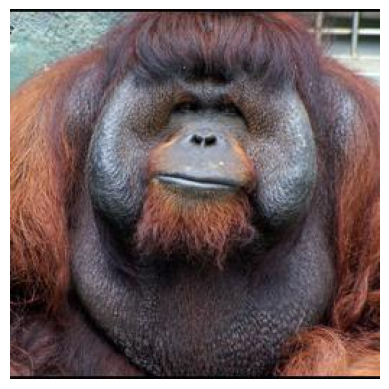

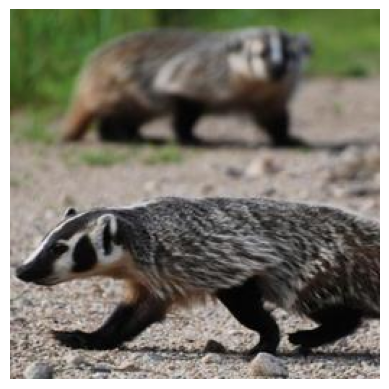

In [48]:
import cv2
import matplotlib.pyplot as plt

print(train_df.file_paths.head())

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[234]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[3535]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

### 2️⃣ 사전 모델 선정을 위한 전체 fit

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(45, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [57]:
from tensorflow.keras.applications.resnet50 import preprocess_input

IMAGE_SIZE = 244
BATCH_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 8800 validated image filenames belonging to 45 classes.
Found 2200 validated image filenames belonging to 45 classes.
Found 2751 validated image filenames belonging to 45 classes.
{'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'armadillo': 5, 'baboon': 6, 'badger': 7, 'blue_whale': 8, 'brown_bear': 9, 'camel': 10, 'dolphin': 11, 'giraffe': 12, 'groundhog': 13, 'highland_cattle': 14, 'horse': 15, 'jackal': 16, 'kangaroo': 17, 'koala': 18, 'manatee': 19, 'mongoose': 20, 'mountain_goat': 21, 'opossum': 22, 'orangutan': 23, 'otter': 24, 'polar_bear': 25, 'porcupine': 26, 'red_panda': 27, 'rhinoceros': 28, 'sea_lion': 29, 'seal': 30, 'snow_leopard': 31, 'squirrel': 32, 'sugar_glider': 33, 'tapir': 34, 'vampire_bat': 35, 'vicuna': 36, 'walrus': 37, 'warthog': 38, 'water_buffalo': 39, 'weasel': 40, 'wildebeest': 41, 'wombat': 42, 'yak': 43, 'zebra': 44}
{'african_elephant': 0, 'alpaca': 1, 'american_bison': 2, 'anteater': 3, 'arctic_fox': 4, 'a

In [58]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 250, 250, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 122, 122, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 124, 124, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 61, 61, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 61, 61, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 61, 61, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 61, 61, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 63, 63, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 61, 61, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,669,545 (90.29 MB)

 Trainable params: 23,624,105 (90.12 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [59]:
import gc

gc.collect()

58017

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [61]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 897s 6s/step - acc: 0.0472 - loss: 3.7929 - val_acc: 0.0414 - val_loss: 4.0630 - learning_rate: 0.0010
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 897s 6s/step - acc: 0.0540 - loss: 3.7287 - val_acc: 0.0259 - val_loss: 3.8063 - learning_rate: 0.0010
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 892s 6s/step - acc: 0.0575 - loss: 3.6756 - val_acc: 0.0600 - val_loss: 5.7685 - learning_rate: 0.0010
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 887s 6s/step - acc: 0.0665 - loss: 3.6216 - val_acc: 0.0695 - val_loss: 48.3787 - learning_rate: 0.0010
Epoch 5/10
 57/138 ━━━━━━━━━━━━━━━━━━━━ 8:02 6s/step - acc: 0.0681 - loss: 3.5385

KeyboardInterrupt: 

In [62]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_40440\2060621764.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,324,329 (8.87 MB)

 Trainable params: 2,290,217 (8.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [64]:
import gc

gc.collect()

29081

In [65]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - acc: 0.1705 - loss: 3.3100 - val_acc: 0.0500 - val_loss: 13.3823 - learning_rate: 0.0010
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - acc: 0.5241 - loss: 1.8119 - val_acc: 0.1068 - val_loss: 10.1664 - learning_rate: 0.0010
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - acc: 0.6788 - loss: 1.2653 - val_acc: 0.0400 - val_loss: 16.0651 - learning_rate: 0.0010
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - acc: 0.7505 - loss: 0.9771 - val_acc: 0.0850 - val_loss: 12.7812 - learning_rate: 0.0010
Epoch 5/10
 15/138 ━━━━━━━━━━━━━━━━━━━━ 6:53 3s/step - acc: 0.8047 - loss: 0.7671

KeyboardInterrupt: 

In [66]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,966,225 (79.98 MB)

 Trainable params: 20,911,697 (79.77 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [68]:
import gc

gc.collect()

14

In [69]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1322s 9s/step - acc: 0.3643 - loss: 2.5626 - val_acc: 0.3218 - val_loss: 5.5637 - learning_rate: 0.0010
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1305s 9s/step - acc: 0.7899 - loss: 0.8580 - val_acc: 0.7495 - val_loss: 1.1213 - learning_rate: 0.0010
Epoch 3/10
 20/138 ━━━━━━━━━━━━━━━━━━━━ 17:14 9s/step - acc: 0.8799 - loss: 0.4943

KeyboardInterrupt: 

### 🚩 결과

#### ResNet50 - 1061s
- epoch 1/10
- acc: 0.0472
- loss: 3.7929
- val_acc: 0.0414
- val_loss: 4.0630

#### MobileNet - 576s
- epoch  1/10 
- acc: 0.1705
- loss: 3.3100
- val_acc: 0.0500
- val_loss: 13.3823

#### Xception - 1322s 
- acc: 0.3643
- loss: 2.5626
- val_acc: 0.3218
- val_loss: 5.5637

### Xception의 정확도가 가장 높음

### 3️⃣ Xception으로 훈련 진행

### 배치 사이즈 64로 훈련을 진행

In [79]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 244
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [80]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [81]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,966,225 (79.98 MB)

 Trainable params: 20,911,697 (79.77 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [82]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [83]:
import gc

gc.collect()

69895

In [84]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1385s 10s/step - acc: 0.3800 - loss: 2.4780 - val_acc: 0.5959 - val_loss: 1.7580 - learning_rate: 0.0010
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1284s 9s/step - acc: 0.8218 - loss: 0.7324 - val_acc: 0.5791 - val_loss: 2.3435 - learning_rate: 0.0010
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1286s 9s/step - acc: 0.8725 - loss: 0.5337 - val_acc: 0.6555 - val_loss: 2.1249 - learning_rate: 0.0010
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1281s 9s/step - acc: 0.9242 - loss: 0.3056 - val_acc: 0.9173 - val_loss: 0.3529 - learning_rate: 1.0000e-04
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1285s 9s/step - acc: 0.9715 - loss: 0.1418 - val_acc: 0.9245 - val_loss: 0.3290 - learning_rate: 1.0000e-04
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1281s 9s/step - acc: 0.9729 - loss: 0.1104 - val_acc: 0.9223 - val_loss: 0.3183 - learning_rate: 1.0000e-04
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1286s 9s/step - acc: 0.9822 - loss: 0.0880 - val_acc: 0.9245 - val_loss: 0.3266 - l

In [85]:
model.evaluate(test_dataset)

43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - acc: 0.9193 - loss: 0.3728


[0.3346736431121826, 0.9269356727600098]

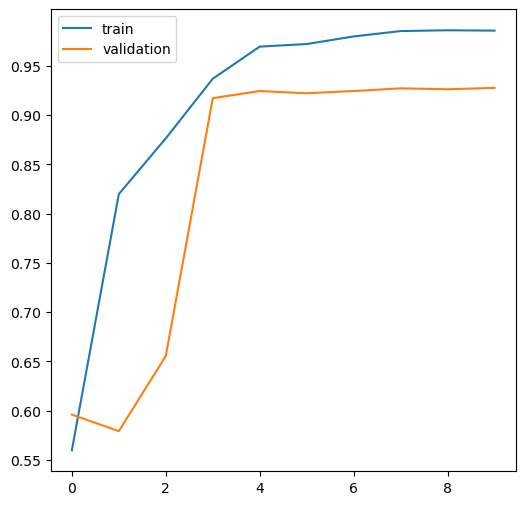

In [86]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🚩 결과

#### 훈련결과
- acc: 0.9858
- loss: 0.0595
- val_acc: 0.9277
- val_loss: 0.3211

#### 테스트 결과
- acc: 0.9193
- loss: 0.3728

#### 과적합이 있다고 판단 batch size를 조정하여 학습을 진행

### batch size = 32로 훈련 진행

In [87]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 244
BATCH_SIZE = 32

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [88]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [89]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,966,225 (79.98 MB)

 Trainable params: 20,911,697 (79.77 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [91]:
import gc

gc.collect()

14866

In [92]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1301s 5s/step - acc: 0.3379 - loss: 2.6141 - val_acc: 0.5636 - val_loss: 1.9339 - learning_rate: 0.0010
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1281s 5s/step - acc: 0.7321 - loss: 1.0973 - val_acc: 0.7209 - val_loss: 1.1942 - learning_rate: 0.0010
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1282s 5s/step - acc: 0.8141 - loss: 0.7477 - val_acc: 0.7332 - val_loss: 1.1369 - learning_rate: 0.0010
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1282s 5s/step - acc: 0.8630 - loss: 0.5608 - val_acc: 0.7518 - val_loss: 1.1740 - learning_rate: 0.0010
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1282s 5s/step - acc: 0.8905 - loss: 0.4303 - val_acc: 0.5991 - val_loss: 3.0133 - learning_rate: 0.0010
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1280s 5s/step - acc: 0.9075 - loss: 0.3812 - val_acc: 0.9082 - val_loss: 0.3580 - learning_rate: 1.0000e-04
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1282s 5s/step - acc: 0.9575 - loss: 0.1821 - val_acc: 0.9109 - val_loss: 0.3387 - learning_r

In [93]:
model.evaluate(test_dataset)

86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 958ms/step - acc: 0.9112 - loss: 0.4226


[0.40950289368629456, 0.9134860038757324]

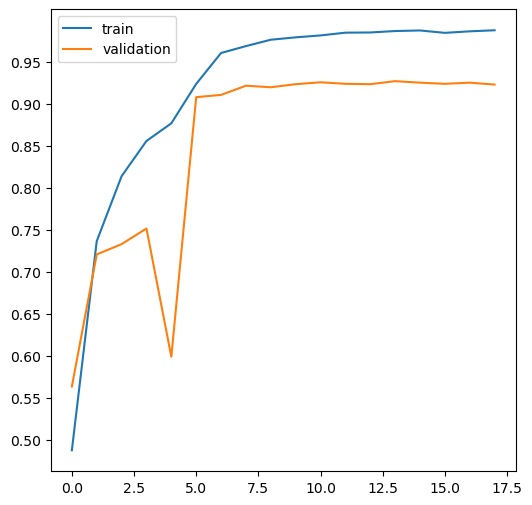

In [94]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🚩 결과

#### 훈련결과
- acc: 0.9876
- loss: 0.0534
- val_acc: 0.9273
- val_loss: 0.3168

#### 테스트 결과
- acc: 0.9112
- loss: 0.4226

### 과적합이 여전히 해소되지 않았다고 판단, 이미지의 사이즈를 늘려 학습

### 256x256으로 학습을 진행

In [103]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 256
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [104]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values


train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [105]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 127, 127, 32)      │             864 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 127, 127, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 127, 127, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 125, 125, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 125, 125, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 125, 125, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 125, 125, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 125, 125, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 125, 125, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 125, 125, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 125, 125, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 63, 63, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 63, 63, 128)       │               

 Total params: 20,966,225 (79.98 MB)

 Trainable params: 20,911,697 (79.77 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

In [107]:
import gc

gc.collect()

38982

In [108]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1471s 11s/step - acc: 0.3562 - loss: 2.5780 - val_acc: 0.5018 - val_loss: 2.4368 - learning_rate: 0.0010
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1448s 10s/step - acc: 0.7976 - loss: 0.8295 - val_acc: 0.6745 - val_loss: 1.8002 - learning_rate: 0.0010
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1447s 10s/step - acc: 0.8752 - loss: 0.5176 - val_acc: 0.7814 - val_loss: 0.9069 - learning_rate: 0.0010
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1448s 11s/step - acc: 0.8962 - loss: 0.4493 - val_acc: 0.6527 - val_loss: 2.3128 - learning_rate: 0.0010
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1448s 10s/step - acc: 0.9192 - loss: 0.3313 - val_acc: 0.6791 - val_loss: 1.8276 - learning_rate: 0.0010


### 결과

- 근소한 수치로 이미지의 사이즈를 변경하였으나 이전보다 더한 과적합 발생

### 244에 batch 64가 적절한 모델임을 확인

### learning rate를 조정하여 과적합을 해결하고자 함

In [180]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(45, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [181]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 244
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [182]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_24[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_72 (Conv2D)            │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 21,908,525 (83.57 MB)

 Trainable params: 21,853,997 (83.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=1,
    mode='min'
)

In [184]:
import gc

gc.collect()

257587

In [185]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 2011s 14s/step - acc: 0.2796 - loss: 3.0797 - val_acc: 0.8755 - val_loss: 0.4649 - learning_rate: 1.0000e-04
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1617s 12s/step - acc: 0.8858 - loss: 0.5001 - val_acc: 0.9364 - val_loss: 0.2361 - learning_rate: 1.0000e-04
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1843s 13s/step - acc: 0.9670 - loss: 0.1505 - val_acc: 0.9368 - val_loss: 0.2090 - learning_rate: 1.0000e-04
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1979s 14s/step - acc: 0.9856 - loss: 0.0667 - val_acc: 0.9436 - val_loss: 0.1939 - learning_rate: 1.0000e-04
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1919s 14s/step - acc: 0.9942 - loss: 0.0350 - val_acc: 0.9445 - val_loss: 0.2102 - learning_rate: 1.0000e-04


In [186]:
model.evaluate(test_dataset)

43/43 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - acc: 0.9342 - loss: 0.2499


[0.22199861705303192, 0.940021812915802]

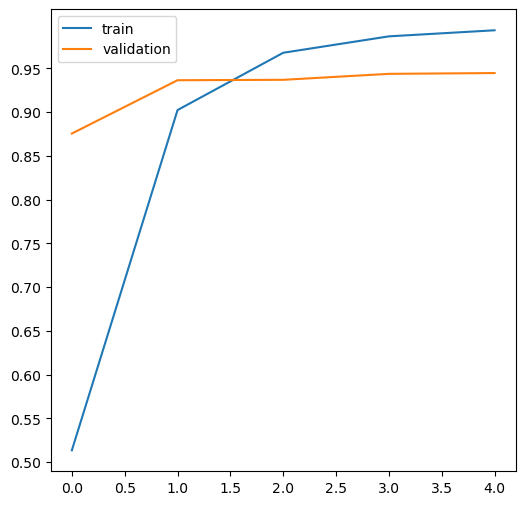

In [187]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🚩 결과

#### learning rate를 0.0001로 조정한 결과 과적합이 이전보다 해소된 것을 확인

#### 훈련결과
- acc: 0.9670
- loss: 0.1505
- val_acc: 0.9368
- val_loss: 0.2090

#### 테스트 결과
- acc: 0.9342
- loss: 0.2499

#### 훈련 성능을 검증

### 4️⃣ 성능 검증

In [207]:
example_images = [
    './datasets/mammals/original/anteater/anteater107.png',
    './datasets/mammals/original/dolphin/dolphin103.png',
    './datasets/mammals/original/red_panda/red_panda100.png',
    './datasets/mammals/original/zebra/zebra113.png',
    './datasets/mammals/original/koala/koala107.png',
    './datasets/mammals/original/armadillo/armadillo104.png',
    './datasets/mammals/original/squirrel/squirrel105.png',
    './datasets/mammals/original/vampire_bat/vampire_bat105.png'
]

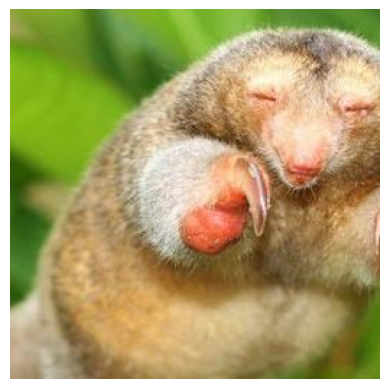

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class Index: 3
Predicted Class Name: anteater
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted: [1.2802419e-27 9.9992996e-01 1.7364961e-21 1.0000000e+00 5.7886052e-03
 9.9999112e-01 7.0312810e-01 1.0000000e+00 1.0000000e+00 9.9999952e-01
 9.9997550e-01 1.2122808e-06 1.0000000e+00 1.7945506e-08 2.2505856e-05
 5.1541960e-10 1.0713938e-03 5.3615686e-15 2.6077705e-03 7.0061586e-05
 6.5296670e-05 1.1488369e-19 1.0000000e+00 9.9998158e-01 1.6144549e-09
 6.0727238e-04 9.9999106e-01 3.3789135e-11 9.9998742e-01 9.5654762e-01
 2.2480765e-04 1.1767764e-05 1.1936564e-15 1.0000000e+00 1.5904253e-10
 1.0000000e+00 1.4679184e-17 2.0137561e-07 2.9208128e-10 3.6413683e-05
 1.0000000e+00 1.2018739e-07 2.4880365e-14 1.0000000e+00 3.4463484e-17]
Predicted Class Index: 3
Predicted Class Name: anteater


In [222]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 244

# 클래스 이름 정의
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 
               'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 
               'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 
               'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 
               'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 
               'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']

# 이미지 가져오기
image_path = example_images[0]
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)
model = load_model('./callback_files/weights.005-0.2102-0.9934.weights.h5')
# 모델 예측
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)

# 모델 예측
predicted = model.predict(resized_image, batch_size=16)[0]
print("Predicted:", predicted)

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)


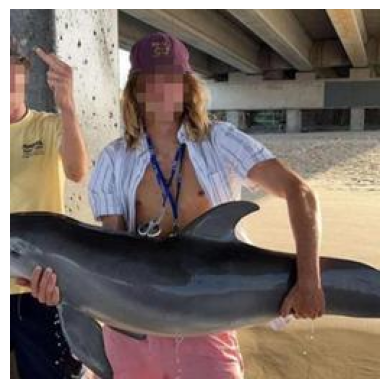

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class Index: 5
Predicted Class Name: armadillo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted: [8.9939516e-05 1.1773238e-02 3.8661621e-08 2.6719105e-01 5.5582064e-01
 9.9999958e-01 8.9079498e-05 9.9990922e-01 9.9394792e-01 9.9652016e-01
 6.8175003e-02 7.3281300e-01 9.9986225e-01 2.3660418e-03 2.6408370e-04
 8.9495800e-02 8.4078968e-01 7.2115012e-02 3.1034662e-05 2.0581950e-04
 9.4721979e-01 1.2249529e-06 1.4233395e-03 9.8857719e-01 9.5275980e-01
 1.1049091e-02 9.9560195e-01 2.9103987e-02 5.6651282e-01 2.6628962e-01
 4.7498128e-01 9.0164483e-01 1.3921382e-05 9.9901533e-01 6.3821918e-01
 4.5382994e-01 6.3168625e-03 1.6637484e-02 5.7104167e-02 4.9844189e-03
 7.9755968e-01 5.0667286e-01 9.9884647e-01 9.8776746e-01 1.4037486e-05]
Predicted Class Index: 5
Predicted Class Name: armadillo


In [236]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 244

# 클래스 이름 정의
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 
               'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 
               'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 
               'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 
               'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 
               'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']

# 이미지 가져오기
image_path = example_images[1]
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)
model = load_model('./callback_files/weights.005-0.2102-0.9934.weights.h5')
# 모델 예측
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)

# 모델 예측
predicted = model.predict(resized_image, batch_size=16)[0]
print("Predicted:", predicted)

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)


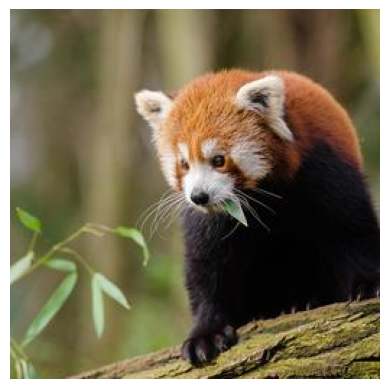

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class Index: 43
Predicted Class Name: yak
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted: [1.9677810e-08 8.1018245e-01 5.7242172e-10 3.0064531e-02 1.8525338e-02
 9.9999869e-01 4.4835228e-03 9.9997818e-01 9.9999964e-01 9.9999028e-01
 3.0776179e-01 3.5917976e-01 9.9999994e-01 1.3512760e-04 4.1945362e-03
 2.7825212e-04 4.5422140e-01 7.5291097e-01 1.4352021e-06 4.2008240e-02
 9.9999523e-01 1.3370914e-12 8.9776895e-06 8.9020360e-01 9.7776598e-01
 2.9623713e-03 9.9998957e-01 1.7106299e-01 6.8934232e-01 5.0191255e-03
 6.5602195e-01 6.3990879e-01 8.9009582e-08 9.9743128e-01 2.8211330e-03
 9.9738908e-01 6.0071785e-04 2.7580003e-04 7.9358765e-04 9.2680961e-01
 9.9885428e-01 4.2056679e-04 9.9927914e-01 1.0000000e+00 2.2015609e-09]
Predicted Class Index: 43
Predicted Class Name: yak


In [237]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 244

# 클래스 이름 정의
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 
               'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 
               'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 
               'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 
               'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 
               'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']

# 이미지 가져오기
image_path = example_images[2]
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)
model = load_model('./callback_files/weights.005-0.2102-0.9934.weights.h5')
# 모델 예측
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)

# 모델 예측
predicted = model.predict(resized_image, batch_size=16)[0]
print("Predicted:", predicted)

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)


### 훈련 성능이 좋지 않아 Albumentation을 추가 하여 학습 진행

### 5️⃣ Albumentation

In [239]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
],p=0.3)

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug,
                        preprocess=resnet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=resnet_preprocess_input)

In [1]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(0.0001), loss=CategoricalCrossentropy(), metrics=['acc'])

NameError: name 'create_model' is not defined

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=1,
    mode='min'
)

In [ ]:
import gc

gc.collect()

In [243]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 1900s 14s/step - acc: 0.2741 - loss: 3.0858 - val_acc: 0.8923 - val_loss: 0.4444 - learning_rate: 1.0000e-04
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 2018s 15s/step - acc: 0.8730 - loss: 0.5651 - val_acc: 0.9350 - val_loss: 0.2480 - learning_rate: 1.0000e-04
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1715s 12s/step - acc: 0.9498 - loss: 0.2100 - val_acc: 0.9441 - val_loss: 0.2023 - learning_rate: 1.0000e-04
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1227s 9s/step - acc: 0.9695 - loss: 0.1257 - val_acc: 0.9414 - val_loss: 0.1994 - learning_rate: 1.0000e-04
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1227s 9s/step - acc: 0.9786 - loss: 0.0824 - val_acc: 0.9482 - val_loss: 0.1995 - learning_rate: 1.0000e-04


In [244]:
model.evaluate(test_dataset)

43/43 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.9428 - loss: 0.2029


[0.18552792072296143, 0.9483823776245117]

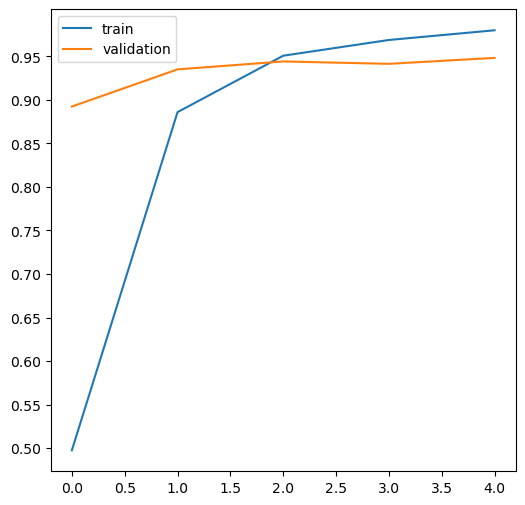

In [245]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🚩 결과

#### 훈련결과
- acc: 0.9786
- loss: 0.0824
- val_acc: 0.9482
- val_loss: 0.1995

#### 테스트 결과
- acc: 0.9428
- loss: 0.2029

#### 전보다 과적합이 해소되고 훈련과 테스트 결과가 소폭 상승되었으므로 훈련 성능을 검증

### 6️⃣ 성능 검증2

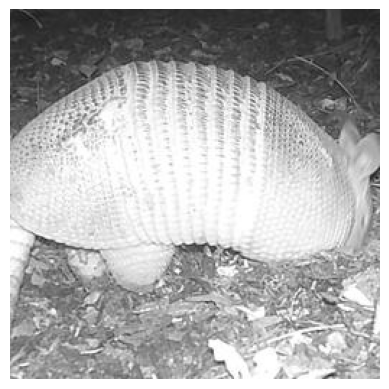

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class Index: 1
Predicted Class Name: alpaca


In [283]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 244

# 클래스 이름 정의
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale','red_panda' ,'brown_bear', 'camel', 
               'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 
               'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 
               'otter', 'polar_bear', 'porcupine',  'rhinoceros', 'seal', 'sea_lion', 
               'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 
               'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']

# 이미지 가져오기
image_path = example_images[5]
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)
model = load_model('./callback_files/weights.005-0.2102-0.9934.weights.h5')
# 모델 예측
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)

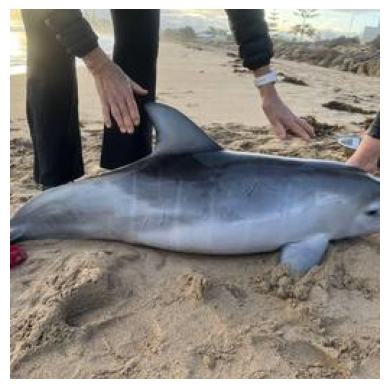

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step
Predicted Class Index: 12
Predicted Class Name: dolphin


In [287]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


IMAGE_SIZE = 244

# 클래스 이름 정의
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale','red_panda' ,'brown_bear', 'camel', 
               'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 
               'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 
               'otter', 'polar_bear', 'porcupine',  'rhinoceros', 'seal', 'sea_lion', 
               'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 
               'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']

# 이미지 가져오기
image_path = example_images[1]
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# 이미지 보기 함수 (추가 기능으로 제공됨)
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

# 이미지 크기 변경
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)
model = load_model('./callback_files/weights.005-0.2102-0.9934.weights.h5')
# 모델 예측
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]

# 가장 높은 확률의 클래스 인덱스 추출
predicted_class_index = np.argmax(predicted_probabilities)
print("Predicted Class Index:", predicted_class_index)

# 예측된 클래스 이름 추출
predicted_class_name = class_names[predicted_class_index]
print("Predicted Class Name:", predicted_class_name)

In [3]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/weights.005-0.2102-0.9934.weights.h5')


NameError: name 'create_model' is not defined

In [ ]:
model.compile(optimizer=Adam(1e-5), loss=CategoricalCrossentropy(), metrics=['acc'])


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
# 클래스 이름 지정
class_names = ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 
               'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 'dolphin', 
               'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 'kangaroo', 'koala', 
               'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 'otter', 'polar_bear', 
               'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 'snow_leopard', 'squirrel', 
               'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 'warthog', 'water_buffalo', 'weasel', 
               'wildebeest', 'wombat', 'yak', 'zebra']


# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 100
end_index = 120

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = xception_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'load_model' is not defined